# Proyek Analisis Data: Air Quality Dataset Dingling
- **Nama:** Laila Wulandari
- **Email:** lailawulandari0811@gmail.com
- **ID Dicoding:** laila_wulandari

## Menentukan Pertanyaan Bisnis

- Apakah ada tren peningkatan atau penurunan kualitas udara selama periode waktu tertentu?
- Bagaimana hubungan antara suhu (TEMP) dan tingkat polusi udara  (PM2.5 dan PM10)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
airQuality_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
airQuality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- Dataset yang digunakan merupakan dataset kualitas udara di Dingling.
- Pada preview dataset di atas, dapat dilihat bahwa memiliki beberapa kolom:
  1. Nomor urut data
  2. Informasi waktu pengukuran (year, month, day)
  3. Konsentrasi berbagai politan udara (PM2.5, SO2, NO2, O3)
  4. Parameter cuaca (TEMP, PRES, DEWP, RAIN)
  5. Arah keccepatan angin (wd dan WSPM)
  6. Nama stasiun pengamatan  

### Assessing Data

Jumlah data kosong:
       PM2.5   PM10   TEMP   year  month
0      False  False  False  False  False
1      False  False  False  False  False
2      False  False  False  False  False
3      False  False  False  False  False
4      False  False  False  False  False
...      ...    ...    ...    ...    ...
35059  False  False  False  False  False
35060  False  False  False  False  False
35061  False  False  False  False  False
35062  False  False  False  False  False
35063  False  False  False  False  False

[35064 rows x 5 columns]
Jumlah nilai tidak valid:
PM2.5: 0 nilai negatif
PM10: 0 nilai negatif
TEMP terlalu rendah: 0 nilai
TEMP terlalu tinggi: 0 nilai
Jumlah data duplikat: 0


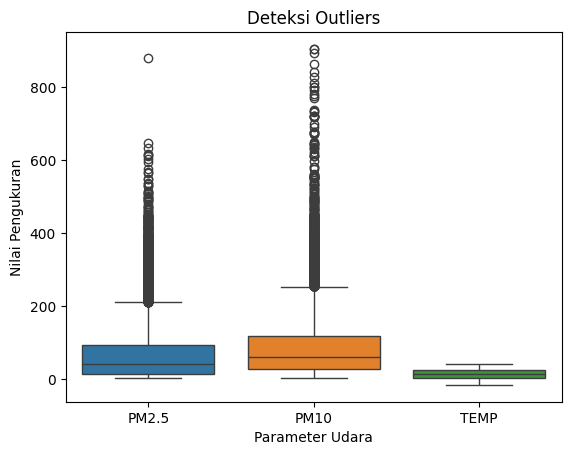

Jumlah outliers PM2.5: 1831
Jumlah outliers PM10: 1430


In [4]:
#Melihat apakah ada data kosong
print("Jumlah data kosong:")
print(airQuality_df[['PM2.5', 'PM10', 'TEMP', 'year', 'month']].isnull())

#Menghitung jumlah nilai tidak valid
invalid_pm25 = (airQuality_df['PM2.5'] < 0).sum()
invalid_pm10 = (airQuality_df['PM10'] < 0).sum()
invalid_temp_low = (airQuality_df['TEMP'] < -50).sum()
invalid_temp_high = (airQuality_df['TEMP'] > 60).sum()

print("Jumlah nilai tidak valid:")
print(f"PM2.5: {invalid_pm25} nilai negatif")
print(f"PM10: {invalid_pm10} nilai negatif")
print(f"TEMP terlalu rendah: {invalid_temp_low} nilai")
print(f"TEMP terlalu tinggi: {invalid_temp_high} nilai")

#Menghitung jumlah data duplikat
duplicate_count = airQuality_df.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

#Boxplot outliers
sns.boxplot(data=airQuality_df[['PM2.5', 'PM10', 'TEMP']])
plt.title("Deteksi Outliers")
plt.xlabel("Parameter Udara")
plt.ylabel("Nilai Pengukuran")
plt.show()

#Menghitung IQR
Q1 = airQuality_df[['PM2.5', 'PM10', 'TEMP']].quantile(0.25)
Q3 = airQuality_df[['PM2.5', 'PM10', 'TEMP']].quantile(0.75)
IQR = Q3 - Q1

#Menentukan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Menghitung jumlah outliers
outliers_pm25 = airQuality_df[(airQuality_df['PM2.5'] < lower_bound['PM2.5']) | (airQuality_df['PM2.5'] > upper_bound['PM2.5'])]
outliers_pm10 = airQuality_df[(airQuality_df['PM10'] < lower_bound['PM10']) | (airQuality_df['PM10'] > upper_bound['PM10'])]

print("Jumlah outliers PM2.5:", outliers_pm25.shape[0])
print("Jumlah outliers PM10:", outliers_pm10.shape[0])


**Insight:**
Pada tahap ini saya memeriksa kualitas dataset untuk memastikan data siap digunakan dalam analisis. Proses ini mencakup:
1. Pemeriksaan jumlah kosong pada kolom PM2.5, PM10, TEMP, year, dan month. Hal ini dilakukan karena untuk memastikan data yang akan digunakan nanti tidak bermasalah. **Hasilnya tidak ada data kosong.**
2. Menghitung jumlah nilai tidak valid pada kolom PM2.5, PM10, dan TEMP. Hal ini dilakukan dengan mengecek apakah ada nilai PM2.5 dan PM10 yang negati, apakah ada suhu yang terlalu tingggi dan terlalu rendah. **Hasilnya tidak ada data yang tidak valid.**
3. Menghitung jumlah data duplikat. **Hasilnya tidak ada data duplikat**
4. Memeriksa outliers mengggunakan boxplot. **Hasilnya pada kolom PM2.5 dan PM10 memiliki banyak outliers, maka harus ada tindakan lebih. Sedangkan kolom TEMP tidak ditemukan outliers.**
5. Menghitung jumlah outliers yang diawali dengann menentukan batas atas dan bawah. **Hasilnya terdapat 1831 outliers pada kolom PM2.5 dan 1430 pada kolom PM10.**

### Cleaning Data

Outliers PM2.5 setelah imputasi: 0
Outliers PM10 setelah imputasi: 0


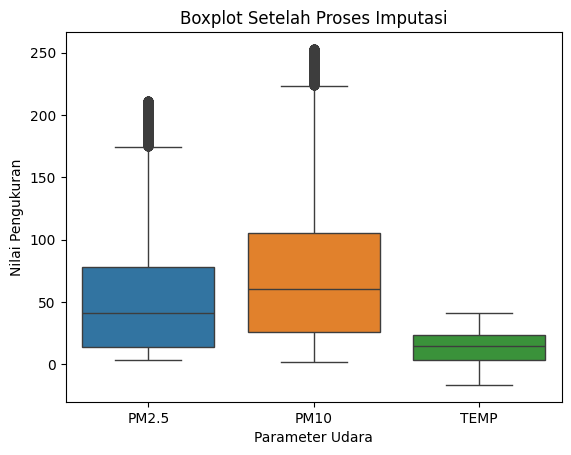

In [5]:
#Menghitung IQR
Q1 = airQuality_df[['PM2.5', 'PM10']].quantile(0.25)
Q3 = airQuality_df[['PM2.5', 'PM10']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Imputasi outliers dengan median
airQuality_df['PM2.5'] = airQuality_df['PM2.5'].apply(
    lambda x: airQuality_df['PM2.5'].median() if x < lower_bound['PM2.5'] or x > upper_bound['PM2.5'] else x
)
airQuality_df['PM10'] = airQuality_df['PM10'].apply(
    lambda x: airQuality_df['PM10'].median() if x < lower_bound['PM10'] or x > upper_bound['PM10'] else x
)

#Menghitung jumlah outliers setelah imputasi
print("Outliers PM2.5 setelah imputasi:", ((airQuality_df['PM2.5'] < lower_bound['PM2.5']) | (airQuality_df['PM2.5'] > upper_bound['PM2.5'])).sum())
print("Outliers PM10 setelah imputasi:", ((airQuality_df['PM10'] < lower_bound['PM10']) | (airQuality_df['PM10'] > upper_bound['PM10'])).sum())

#Boxplot setelah imputasi
sns.boxplot(data=airQuality_df[['PM2.5', 'PM10', 'TEMP']])
plt.title("Boxplot Setelah Proses Imputasi")
plt.xlabel("Parameter Udara")
plt.ylabel("Nilai Pengukuran")
plt.show()


**Insight:**
Pada tahap ini dilakukan cleaning data dari hasil yang telah ditemukan sebelumnya, yaitu adanya outliers pada kolom PM2.5 dan PM10. Lalu akan dilakukan imputasi dengan median. Hal ini dilakukan untuk tetap menjaga ukuran dataset dan mengurangi pengaruh outliers ekstrem pada analisis nanti.

Hasil:
Setelah dilakukan proses cleaning dengan imputasi, maka outliers pada kolom PM2.5 dan PM10 tidak ada dan data siap digunakan

## Exploratory Data Analysis (EDA)

Statistik Deskriptif PM2.5 dan PM10:
              PM2.5          PM10
count  34285.000000  34408.000000
mean      53.190139     72.477342
std       48.946879     57.729994
min        3.000000      2.000000
25%       14.000000     26.000000
50%       41.000000     60.000000
75%       78.000000    105.000000
max      211.000000    253.000000
Rata-rata Bulanan PM2.5 dan PM10:
           PM2.5       PM10
month                      
1      55.835587  76.106582
2      47.471256  66.141399
3      58.871719  88.010814
4      59.202632  90.287713
5      49.956358  82.804070
6      53.100811  63.697390
7      58.000892  67.740199
8      43.057932  53.857831
9      46.334265  57.156944
10     53.867864  73.766967
11     58.604963  77.111115
12     53.510072  72.411183
Periode dengan PM2.5 Tertinggi:
       year  month  PM2.5
32617  2016     11  211.0
32408  2016     11  211.0
34469  2017      2  211.0
8098   2014      2  211.0
34249  2017      1  211.0
Periode dengan PM10 Tertinggi:
       year 

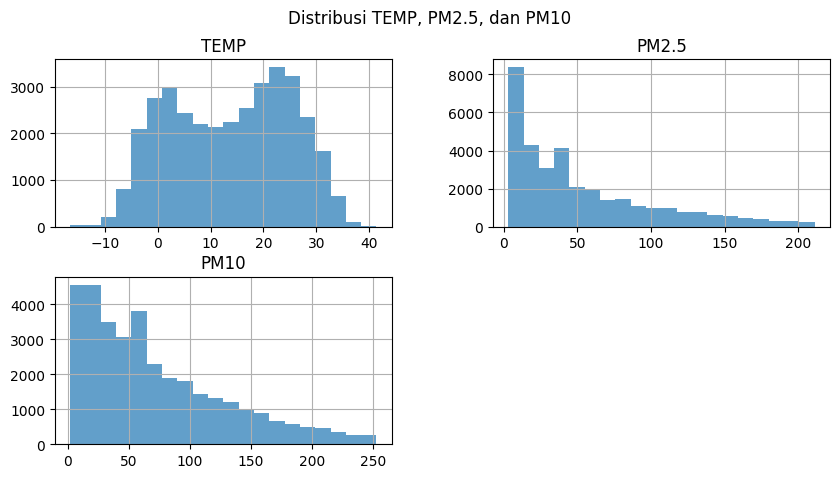

In [20]:
#Statistik deskriptif kolom PM2.5 dan PM10
print("Statistik Deskriptif PM2.5 dan PM10:")
print(airQuality_df[['PM2.5', 'PM10']].describe())

#Menghitung rata-rata PM2.5 dan PM10 per bulan
monthly_trend = airQuality_df.groupby('month')[['PM2.5', 'PM10']].mean()
print("Rata-rata Bulanan PM2.5 dan PM10:")
print(monthly_trend)

#Mengurutkan data untuk berdasarkan PM2.5 tertinggi
sorted_pm25 = airQuality_df.sort_values(by='PM2.5', ascending=False)
print("Periode dengan PM2.5 Tertinggi:")
print(sorted_pm25[['year', 'month', 'PM2.5']].head())

#Mengurutkan data untuk berdasarkan PM10 tertinggi
sorted_pm25 = airQuality_df.sort_values(by='PM10', ascending=False)
print("Periode dengan PM10 Tertinggi:")
print(sorted_pm25[['year', 'month', 'PM10']].head())

#Mengurutkan data untuk berdasarkan PM2.5 terendah
sorted_pm25 = airQuality_df.sort_values(by='PM2.5', ascending=True)
print("Periode dengan PM2.5 Terendah:")
print(sorted_pm25[['year', 'month', 'PM2.5']].head())

#Mengurutkan data untuk berdasarkan PM10 terendah
sorted_pm25 = airQuality_df.sort_values(by='PM10', ascending=True)
print("Periode dengan PM10 Terendah:")
print(sorted_pm25[['year', 'month', 'PM10']].head())

#Distribusi data TEMP, PM2.5, dan PM10
airQuality_df[['TEMP', 'PM2.5', 'PM10']].hist(bins=20, figsize=(10, 5), alpha=0.7)
plt.suptitle("Distribusi TEMP, PM2.5, dan PM10")
plt.show()


**Insight:**
Pada tahap kali ini dilakukan eksplorasi data yang mencakup:
1. Melihat statistik deskriptif pada kolom PM2.5 dan PM10 sebagai alat bantu untuk memahami distribusi polusi udara. **Hasilnya adalah data PM2.5 dan PM10 memiliki variasi data yang signifikan dapat dilihat dari rata-rata dan standar deviasinya.**
2. Menghitung rata-rata bulanan untuk kolom PM2.5 da PM10 untuk melihat tren kualitas udara berdasarkan bulan. **Hasilnya adalah terdapat bulan tertentu yang memiliki tingkat polusi yang lebih tinggi.**
3. Mengurutkan data untuk dengan PM22.5 dan PM10 tertinggi dan terendahuntuk mengidentifikasi tingkat polusi tertinggi pada waktu yang lebih spesifik. **Hasilnya terdapat periode tertentu yang memiliki nilai PM2.5 dan PM10 tertinggi dan terendah.**
4. Membuat histogram untuk melihat distribusi data kolom PM2.5, PM10, dan TEMP untuk menganalisis pola distribusi. **Hasilnya data pada kolom TEMP stabil pada rentang suhu tertentu, sedangkan pada kolom PM2.5 dan PM10 memiliki nilai yang lebih variatif, sebagian besar di rentang rendah hingga sedang dan sisanya rentang tinggi.**



## Visualization & Explanatory Analysis

### Pertanyaan 1:

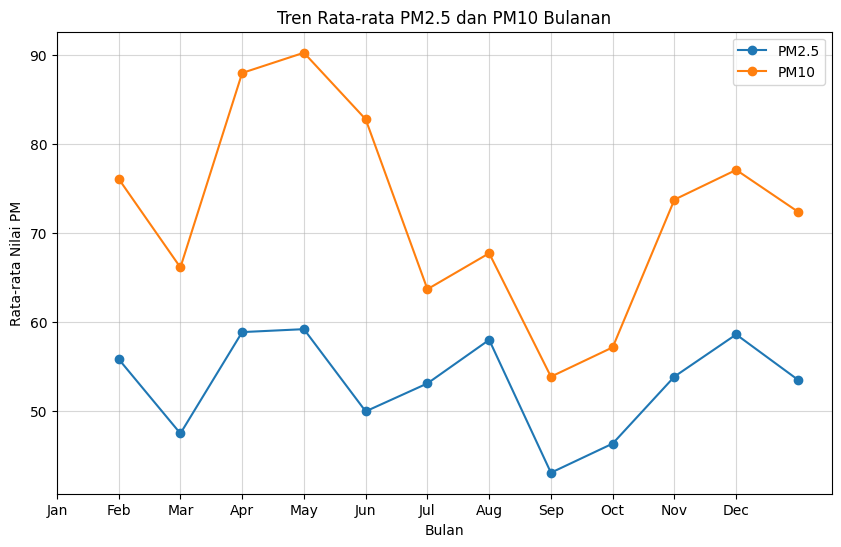

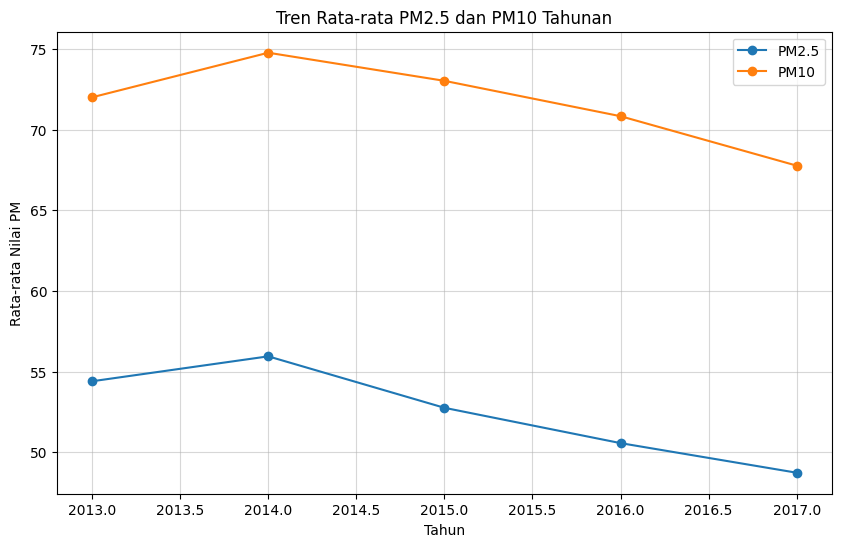

In [26]:
#Menghitung rata-rata PM2.5 dan PM10 per bulan
monthly_trend = airQuality_df.groupby('month')[['PM2.5', 'PM10']].mean()

#Visualisasi tren bulanan
monthly_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Tren Rata-rata PM2.5 dan PM10 Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Nilai PM")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend(["PM2.5", "PM10"])
plt.show()

#Rata-rata PM2.5 dan PM10 per tahun
yearly_trend = airQuality_df.groupby('year')[['PM2.5', 'PM10']].mean()

# Visualisasi tren tahunan
yearly_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Tren Rata-rata PM2.5 dan PM10 Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Nilai PM")
plt.grid(alpha=0.5)
plt.legend(["PM2.5", "PM10"])
plt.show()


**Insight:**

Pada tahapan ini dilakukan analissi tingkat polusi bulanan dengan menggunakan rata-rata bulanan dan tahunan dari nilai polusi udara (PM2.5 dan PM10) untuk mengidentifikasi adanya pola yang muncul selama rentang waktu tertentu. Langkahnya mencakup penghitungan rata-rata per bulan dan per tahun, diikuti dengan visualisasi menggunakan grafik garis (line plot) untuk menggambarkan tren.



### Pertanyaan 2:

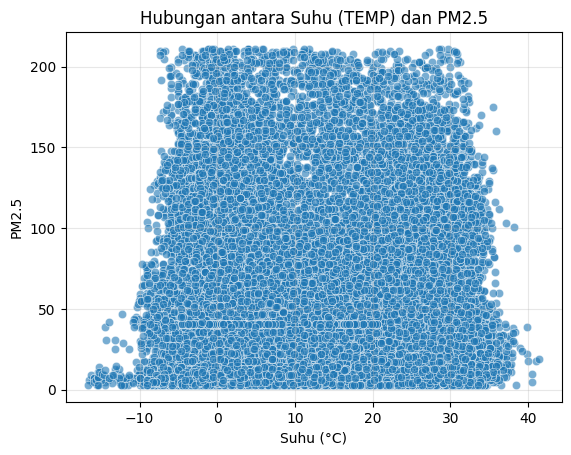

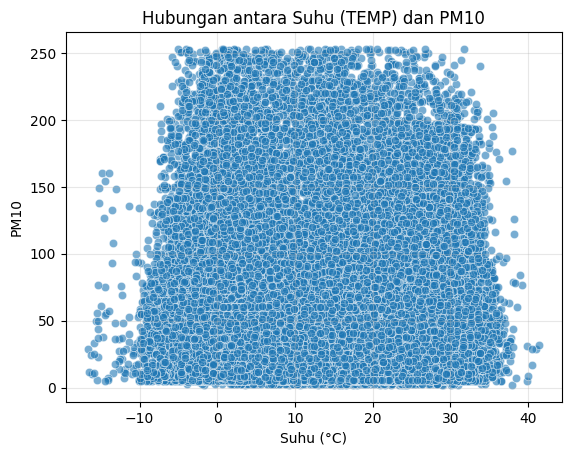

Korelasi antara TEMP dan PM2.5: 0.01
Korelasi antara TEMP dan PM10: 0.01


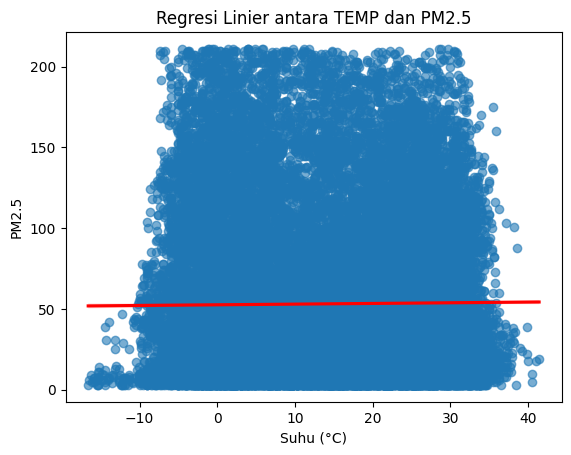

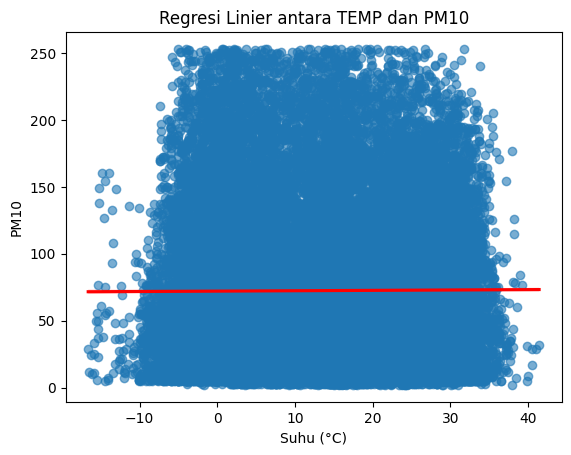

In [28]:
#Scatter plot TEMP vs PM2.5
sns.scatterplot(data=airQuality_df, x='TEMP', y='PM2.5', alpha=0.6)
plt.title("Hubungan antara Suhu (TEMP) dan PM2.5")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM2.5")
plt.grid(alpha=0.3)
plt.show()

#Scatter plot TEMP vs PM10
sns.scatterplot(data=airQuality_df, x='TEMP', y='PM10', alpha=0.6)
plt.title("Hubungan antara Suhu (TEMP) dan PM10")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM10")
plt.grid(alpha=0.3)
plt.show()

#Korelasi antara TEMP dan PM2.5/PM10
correlation_pm25 = airQuality_df['TEMP'].corr(airQuality_df['PM2.5'])
correlation_pm10 = airQuality_df['TEMP'].corr(airQuality_df['PM10'])

print(f"Korelasi antara TEMP dan PM2.5: {correlation_pm25:.2f}")
print(f"Korelasi antara TEMP dan PM10: {correlation_pm10:.2f}")

#Scatter plot dengan regresi TEMP vs PM2.5
sns.regplot(data=airQuality_df, x='TEMP', y='PM2.5', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Regresi Linier antara TEMP dan PM2.5")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM2.5")
plt.show()

#Scatter plot dengan regresi TEMP vs PM10
sns.regplot(data=airQuality_df, x='TEMP', y='PM10', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Regresi Linier antara TEMP dan PM10")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM10")
plt.show()


**Insight:**

Pada tahapan kali ini dilakukan visualisasi data dengan menggunakan scatter plot untuk mengetahui hubungan antara suhu(TEMP) dengan polusi udara (PM2.5 dan PM10). Tahapan ini diawali dengan membandingkan antara suhu dengan masing-masing PM2.5 dan PM10, kemudian menghitung korelasinya lu membuat regresi linear untuk memperdalam hubungan antara suhu dan polusi.



## Conclusion

- Conclution pertanyaan 1

Berdasarkan visualisasi data dapat disimpulkan bahwa:
1.   Tren Bulanan


  *   **Peningkatan**: Grafik menunjukkan adanya peningkatan polusi pada bulan bulan tertentu, khususnya pada awal tahun (Maret-April) dan akhir tahun (Oktober-Desember). Hal ini dapat disebabkan karena aktifitas manusia maupun pola cuaca seperti kemarau.
  *   **Penurunan**: Grafik menunjukkan adanya penurunan polusi pada pertengahan tahun, terutamadi bulan Juli-September. Hal ini kemungkinan terjadi karena sedang musim hujan atau adanya intensitas angin yang lebih tinggi.
2.   Tren Tahunan

  *   **Peningkatan**: Grafik menunjukkan adanya peningkatan polusi mulai dari tahun 2013 hingga pada puncaknya tahun 2014. Hal ini dapat disebabkan adanya fenomena khusus, seperti kemarau penjang maupun kebakaran hutan.
  *   **Penurunan**: Grafik menunjukkan adanya penurunan polusi secara bertahap setelah tahun 2014 hingga tahun 2017. Hal ini dapat disebabkan karena adanya kebijakan baru mengenai lingkungan maupun peningkatan kesadaran masyarakat.
- Conclution pertanyaan 2

Berdasarkan visualisasi datanya, dapat disimpulkan bahwa suhu (TEMP) **tidak memiliki hubungan linear** yang signifikan dengan polusi (PM2.5 dan PM10). Hal ini juga dibuktikan dengan koefisien korelasi yang hanya 0,01.